# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**c.** The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [6]:
conv = df.query('converted == 1')['user_id'].nunique() / df.user_id.nunique()

In [7]:
conv

0.12104245244060237

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [8]:
df_treat = df[((df['group'] == 'treatment') & (df['landing_page'] != 'new_page'))]

In [9]:
df_treat['user_id'].nunique()

1965

**f.** Do any of the rows have missing values?

In [10]:
df_treat.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No, it Doesn’t have null values

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))
         |
         ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


it is 290585 row

In [13]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [15]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [16]:
duplicatedRow = df2[df2.duplicated(['user_id'])]

**c.** Display the rows for the duplicate **user_id**? 

In [17]:
duplicatedRow

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [18]:
df2 = df2.drop_duplicates('user_id',keep='last')

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [20]:
df2.user_id.nunique()

290584

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [21]:
conv1 = df2['converted'].mean()
conv1

0.11959708724499628

##### it is 11.95%

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
cont = df2.query('group == "control"')['converted'].mean()

In [23]:
cont

0.1203863045004612

##### it is 12.03%

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
treat = df2.query('group == "treatment"')['converted'].mean()

In [25]:
treat

0.11880806551510564

##### it is 11.88%

In [26]:
obs_diff = treat - cont

In [27]:
obs_diff

-0.0015782389853555567

so, the difference between treatment and control are -0.0015

**d.** What is the probability that an individual received the new page?

In [28]:
df2[(df2['landing_page']=='new_page')].count() / df2.count()

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

##### it is 50.00%

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

Well, as we see the probability of converted people in "control" group is 12.03% and probability of converted people in "treatment" group is 11.88%. So, the probability of converted people in "Control" group is higher than "Treatment" group, but it is a slight different so I think its not something that we can decide about it. 

> we can't decide, or we can say there is no evidence that makes as decide if there is more conversions

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

> **$H_0$**: **$p_{new}$** - **$p_{old}$** <= 0 
<br>**$H_1$**: **$p_{new}$** - **$p_{old}$** > 0 

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [29]:
p_new = df2['converted'].mean()

In [30]:
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [31]:
p_old = df2['converted'].mean()

In [32]:
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [33]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

In [34]:
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [35]:
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()

In [36]:
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [37]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size = n_new, p = [p_new,1-p_new]) 

In [38]:
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
np.unique(new_page_converted)

array([0, 1])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [40]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], size = n_old,p = [p_old,1-p_old])

In [41]:
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
np.unique(old_page_converted)

array([0, 1])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [43]:
conv_diff = new_page_converted.mean() - old_page_converted.mean()

In [44]:
conv_diff

-0.00080331041336556552


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [45]:
new_page_conv_sample = np.random.binomial(n_new, p_new, 10000) / n_new

In [46]:
old_page_conv_sample = np.random.binomial(n_old, p_old, 10000) / n_old

In [47]:
p_diffs = new_page_conv_sample - old_page_conv_sample

In [48]:
#Numpy array consist of Distribution of each value 
p_diffs

array([ 0.00169786,  0.00152606, -0.00071095, ..., -0.00263112,
       -0.00013978, -0.00032569])

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

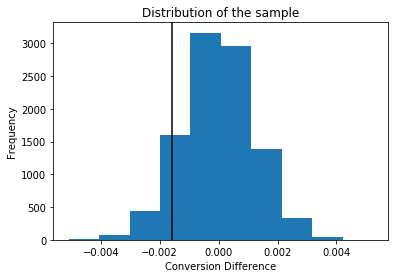

In [49]:
plt.hist(p_diffs)
plt.title('Distribution of the sample')
plt.xlabel('Conversion Difference')
plt.ylabel('Frequency')
plt.axvline(obs_diff, c='black')
plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [50]:
(obs_diff < p_diffs).mean()

0.90580000000000005

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>1. It’s called p-value which is (0.9046)

> 2. Our p-value is larger than "Type I error rate (0.05)". Which indicates that we fail to reject the null hypothesis. Hence, it means that the new page is worse than or equal the old page.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [51]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

# number of conversions with the new_page
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()

# number of individuals who were shown the old_page
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()

# number of individuals who received new_page
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org


In [52]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old,n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

> Our z-score (1.31092419842) is less than the z-critical value (1.645). Thus, we fail to reject the null hypothesis

> Our p-value (0.905058312759) is higher than (0.05) which is the significant level. Thus, we fail to reject the null hypothesis.

> Based on our results, they agree with the findings in parts **j.** and **k.**.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

> because we have two categories, we will use Logistic Regression

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [53]:
#1
df2['intercept']=1

In [54]:
#2
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']

In [55]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [56]:
#Deleteing Group column because we dont need it from now
df2 = df2.drop('group', axis=1)

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [57]:
#Insatiate our model 
import statsmodels.api as sm
log_reg = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

In [58]:
#Fit the model 
log = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [59]:
log.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-28 22:41 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

> the p-value of **ab_page** was (0.1899)

> the null hypothesis with the logistic regression model are two-sided, while in the previews part was one-sided. so it differs between each other. because in the previous part we was talking about that the old page is better than the new page.

> Since the p-value of ab_page was (0.1899), and the significance level is (0.05). 0.1899>0.05. Hence, we fail to reject the null hypothesis.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Maybe the time that the user is using the pages, so if he used them in the late night maybe he will not go to the new page. So we could put a categorical feature which is about time such as: Late night, morning...

> Most of the time in the modeling, if we added more features to our model it will increase the accuracy of the model. So it will give us a good results. But maybe we will face a multi-Collinearity. 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [60]:
# Read the countries.csv
countries = pd.read_csv('countries.csv')

In [61]:
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [73]:
#in both dataframes, we have a common column between them which is user_id
merged_df = df2.merge(countries, on = 'user_id')

In [74]:
merged_df.head(2)

,user_id,timestamp,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0,US


In [75]:
# Create the necessary dummy variables
merged_df[['CA','UK','US']] = pd.get_dummies(merged_df['country'])

In [76]:
merged_df.head(10)

,user_id,timestamp,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,old_page,0,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,new_page,1,1,1,CA,1,0,0
7,719014,2017-01-17 01:48:29.539573,old_page,0,1,0,US,0,0,1
8,817355,2017-01-04 17:58:08.979471,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,new_page,1,1,1,CA,1,0,0


In [77]:
#Dropping country & CA columns
merged_df = merged_df.drop(columns=['country'], axis=1)

In [78]:
merged_df.head(2)

,user_id,timestamp,landing_page,converted,intercept,ab_page,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0,0,0,1


In [79]:
# Fit your model, and summarize the results
merged_df['intercept'] = 1
merged_log = sm.Logit(merged_df['converted'], merged_df[['intercept', 'ab_page', 'UK', 'US']])

In [80]:
logisticReg = merged_log.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [81]:
logisticReg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-28 22:44 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

> Since the p-value of UK, US was (0.0745, 0.1295), which os also greater than the sgnificance value(0.05). we fail to reject the null hypothesis. which means that there is no effect on the Conversions based on the country.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [82]:
merged_df['ab_UK'] = merged_df['ab_page'] * merged_df['UK']
merged_df['ab_CA'] = merged_df['ab_page'] * merged_df['CA']

In [83]:
logit_mod = sm.Logit(merged_df['converted'], 
                     merged_df[['intercept','ab_page','UK','CA','ab_UK', 'ab_CA']])

In [84]:
final = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [85]:
final.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-01-28 22:45 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
ab_UK         0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
ab_CA        -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

##### Conclusion

> as we can see in the result, p-value of (ab_UK, ab_CA) which is (0.2377, 0.3833) greater than the significant value which is (0.05). Thus, we fail to reject the null hypothesis. Which means that the interaction between country and the page doesn’t has an effect on onversion.

> As we can see, the Regression model we used it is not showing that country of the user or page type has an effect about the conversion. Even after we added more features.

> So maybe we need to make the experiment longer I think or we may want to more information in our data so it can help us more.